# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

np.random.seed(2606)

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

def build_datasets(train, valid, test):
    '''
    Convenience function to build or rebuild all 3 datasets from orignal pickles.
    '''
    X_train, y_train = np.array(train['features']), np.array(train['labels'])
    X_valid, y_valid = np.array(valid['features']), np.array(valid['labels'])
    X_test, y_test = np.array(test['features']), np.array(test['labels'])
    return X_train, y_train, X_valid, y_valid, X_test, y_test

X_train, y_train, X_valid, y_valid, X_test, y_test = build_datasets(train, valid, test)

In [2]:
# For test purposes: Take a sample of the data
sample_size = 1000
sample_idx = np.round(np.random.sample(sample_size) * X_train.shape[0]).astype(np.int32)
X_train = X_train[sample_idx]
y_train = y_train[sample_idx]
print(X_train.shape, y_train.shape)

(1000, 32, 32, 3) (1000,)


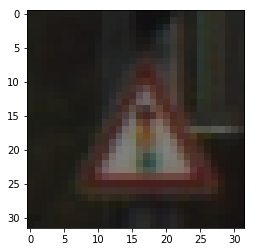

In [3]:
plt.figure(figsize = (4, 4))
plt.imshow(X_train[0])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# Number of validation examples:
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[np.random.randint(0, n_train)].shape[:2]  # Select a random image

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 1000
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

 * **First, look at a few random images from the training set:**
 
 Note that these images are from the original data (no jittering or colour adjustment).

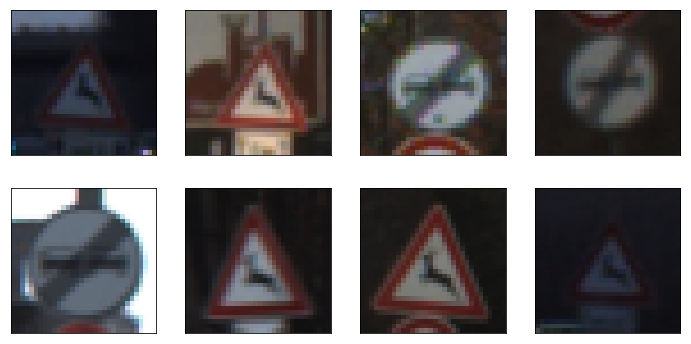

In [6]:
rand_images = np.random.randint(0, n_train, size = 8)
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (12, 6),
                        subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train['features'][rand_images[i]])

It seems that some of the signs, especially those with digits on them, might be challenging due to the low image resolution and lighting conditions.

* **Count of each sign:**

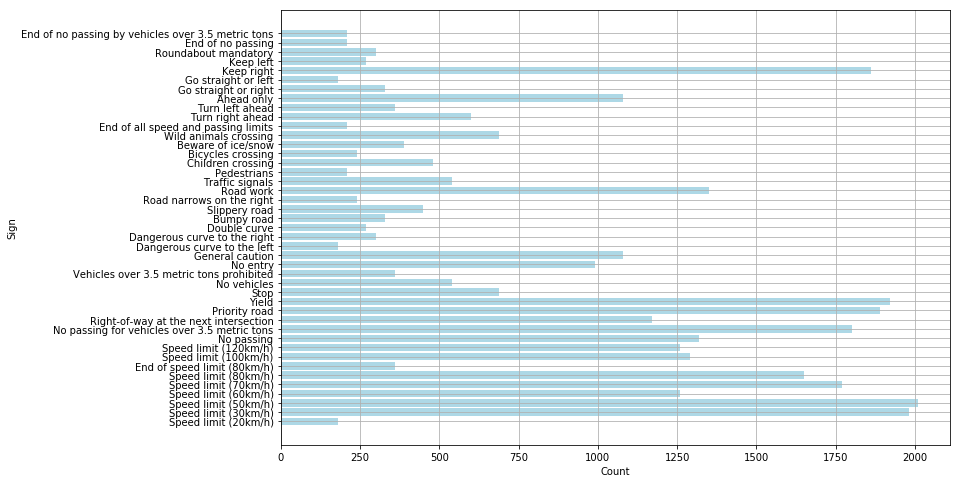

In [7]:
# First import the sign id mapping and make a data frame for the training set:
sign_labels = pd.DataFrame(train['labels'], columns = ['labels'])
sign_names = pd.read_csv('signnames.csv', index_col = 'ClassId')
signs_train = pd.DataFrame(train['features'][:, 0, 0, 0], 
                           columns = ['num_example'])
signs_train = pd.concat([signs_train, sign_labels], axis = 1)
signs_train = signs_train.join(sign_names, on = 'labels')

signs_train_grp = signs_train.groupby(['labels', 'SignName'], 
                                      as_index = False).count()

plt.figure(figsize = (12, 8))    
plt.barh(signs_train_grp['labels'], signs_train_grp['num_example'], color = 'lightblue')
plt.xlabel('Count')
plt.ylabel('Sign')
plt.yticks(signs_train_grp['labels'], signs_train_grp['SignName'])
plt.grid(True)
plt.show()


The dataset is very unbalanced, which we should try to correct if we are to achieve consistent performance accross all classes.

In [8]:
X_train, y_train, X_valid, y_valid, X_test, y_test = build_datasets(train, valid, test)

In [9]:
# Conversions to different colour maps

def convert_to_grey(x):
    '''
    Converts a collection of images (stored as a single np.ndarray, axis 0 denoting the
    index within the collection) to greyscale.
    Returns a collection of 1-channel images of same dimensions.
    
    x: a 3-channel array
    '''
    x_out = np.zeros((x.shape[0], x.shape[1], x.shape[2], 1))
    for i in range(x_out.shape[0]):
        x_out[i, : , : , 0] = cv2.cvtColor(x[i], cv2.COLOR_RGB2GRAY)
    return x_out

def convert_to_Y(x):
    '''
    Converts a collection of images (stored as a single np.ndarray, axis 0 denoting the
    index within the collection) to greyscale.
    Returns a collection of 1-channel images of same dimensions.
    
    x: a 3-channel array
    '''
    x_out = np.zeros((x.shape[0], x.shape[1], x.shape[2], 1))
    for i in range(x_out.shape[0]):
        x_out[i, : , : , 0] = cv2.cvtColor(x[i], cv2.COLOR_RGB2YCrCb)[:, :, 0]
    return x_out

def convert_to_hls_drop_2(x):
    '''
    Converts a collection of images (stored as a single np.ndarray, axis 0 denoting the
    index within the collection) to HLS and drops the H and S channels.
    Returns a collection of 1-channel image of same dimensions.
    
    x: a 3-channel array
    '''
    x_out = np.zeros((x.shape[0], x.shape[1], x.shape[2], 1))
    for i in range(x_out.shape[0]):
        x_out[i, : , : , 0] = cv2.cvtColor(x[i], cv2.COLOR_RGB2HLS)[: , :, 1]
    return x_out

def convert_to_colorspace_3(x, code):
    '''
    Converts a collection of images (stored as a single np.ndarray, axis 0 denoting the
    index within the collection) to another 3-channel colourspace.
    Returns a collection of 3-channel image of same dimensions.
    
    x: a 3-channel array
    '''
    x_out = np.zeros_like(x)
    for i in range(x_out.shape[0]):
        x_out[i] = cv2.cvtColor(x[i], code)
    return x_out

#X_train = convert_to_grey(X_train)
#X_valid = convert_to_grey(X_valid)
#X_test = convert_to_grey(X_test)
X_train = convert_to_Y(X_train)
X_valid = convert_to_Y(X_valid)
X_test = convert_to_Y(X_test)
#X_train = convert_to_hls_drop_2(X_train)
#X_valid = convert_to_hls_drop_2(X_valid)
#X_test = convert_to_hls_drop_2(X_test)
#X_train = convert_to_colorspace_3(X_train, cv2.COLOR_RGB2YCrCb)
#X_valid = convert_to_colorspace_3(X_valid, cv2.COLOR_RGB2YCrCb)
#X_test = convert_to_colorspace_3(X_test, cv2.COLOR_RGB2YCrCb)

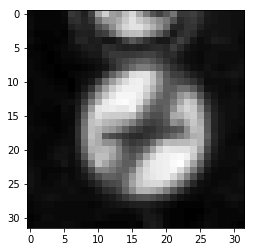

In [10]:
plt.imshow(X_train[0,:,:,0], cmap='gray')

In [11]:
import copy

VARIATIONS = 4  # Number of fake images to generate for each real one

def jitter_image(x):
    '''
    Takes an image and returns a jittered version of it by applying random
    scaling, translation and rotation.
    
    x: an image array
    
    '''
    s_y, s_x = x[:,:,0].shape  # Store original shape
    
    # Scale by a random factor between .85 and 1.15
    scaling_x = 0.3 * np.random.sample() + 0.85
    scaling_y = 0.3 * np.random.sample() + 0.85 
    img = cv2.resize(x, dsize = (0, 0), fx = scaling_x, fy = scaling_y)
    
    # Restore original array size by adding padding
    s_y_new, s_x_new = x[:,:,0].shape  # Get new shape after resizing
    y_padding = round(s_y - s_y_new)
    x_padding = round(s_x - s_x_new)
    x = cv2.copyMakeBorder(x, y_padding, y_padding, x_padding, x_padding, 
                             cv2.BORDER_WRAP)
     
    # Translate by a random number of pixels between -2 and +2
    trans_x = 4. * np.random.sample() - 2
    trans_y = 4. * np.random.sample() - 2
    M_trans = np.float32([[1, 0, trans_x], [0, 1, trans_y]])  # Define translation matrix
    x = cv2.warpAffine(x, M = M_trans, dsize = (32, 32),  # Apply translation
                       borderMode = cv2.BORDER_WRAP)
    
    # Rotate by a random angle between -10 and +10 degrees
    rot_deg = 20 * np.random.sample() - 10
    M_rot = cv2.getRotationMatrix2D((round(s_x / 2), round(s_y / 2)), rot_deg, 1) # Define rot. matrix
    x = cv2.warpAffine(x, M = M_rot, dsize = (s_x, s_y),  # Apply rotation
                       borderMode = cv2.BORDER_WRAP)  
       
    return x[:, :, np.newaxis]


def adjust_channels(x):
    '''
    Takes an image and applies a different adjustment to each channel 
    sampled from the interval [.95, 1.05]. Returns the modified image.
    
    x: an image array
    '''
    for chan in range(x.shape[2]):
        adj_coeff = 1. + np.random.randn() * 0.05
        lower = np.zeros_like(x[:,:, chan])
        upper = np.zeros_like(x[:,:, chan]) + 255
        x[:,:, chan] = np.maximum(lower, x[:,:, chan] * adj_coeff)
        x[:,:, chan] = np.minimum(x[:,:, chan], upper)
    return x


def balance_data(x, y):
    '''
    Creates copies of the different images so that the total count of all classes is roughtly the same.
    Only run once, during pre-processing phase.
    
    x: input array of images (each slice along 0 corresponds to an image)
    y: array of labels
    
    Returns 
    '''
    initial_len = len(y)  # Number of rows in the original dataset
    idx_list = [i for i in range(initial_len)]  # Initialize index list with indices of y examples
    count_per_label = np.bincount(y, minlength = 43)  # Count the number of examples for each label
    max_count = np.max(count_per_label) # Count of the largest class
                             
    for i in range(initial_len):  # Loop through the dataset to build a pointer array representing
        # the final X_out and y_out np.arrays       
        lbl_count = count_per_label[y[i]]
        copies_to_add = int(round((max_count - lbl_count) / lbl_count))
        idx_list.extend([i] * copies_to_add)
    
    x_out = np.zeros((len(idx_list), x.shape[1], x.shape[2], x.shape[3]), 
                     dtype = np.float32)                 # Reserve space for X_out
    y_out = np.zeros(len(idx_list), dtype = np.float32)  # Reserve space for y_out
    
    for i in range(len(idx_list)):  # Fill x_out and y_out with copies of x[i] and y[i] as 
        # required by idx_list
        if i < initial_len:  # If the image is part of the original data, keep it untouched
            x_out[i] = x[idx_list[i]]
        else:  # If it's generated to balance the data, jitter and clour-adjust it
            x_out[i] = adjust_channels(jitter_image(x[idx_list[i]]))
        y_out[i] = y[idx_list[i]]
    
    return x_out, y_out

X_train, y_train = balance_data(X_train, y_train)
print(X_train.shape, y_train.shape)

(87657, 32, 32, 1) (87657,)


(0, 3000)

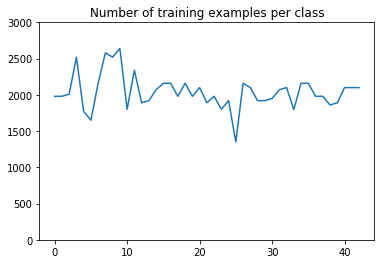

In [12]:
plt.plot([np.bincount(y_train.astype(np.int32), minlength = 43)[i] for i in range(43)])
plt.title("Number of training examples per class")
plt.ylim((0, 3000))

We can see that the dataset is now much more balanced than previous. The new copies are alreay jittered and colour-adjusted, but we want more data so we will generate additional copies.

In [13]:
def create_fakes(x, y):
    '''
    Takes a single image as input and produces 5 variations with random
    jittering and channel adjustments.
    
    x: Single image (a 3-dimensional np.ndarray))
    variations: How many jittered / colour-adjusted copies of the original
                image to return?
            
    Returns: An 4d-array of stacked images such that x_out.shape[0] == variations
    '''
    x_out = np.array([adjust_channels(jitter_image(x)) for img in range(VARIATIONS)])
    y_out = np.array([y for img in range(VARIATIONS)])  # Don't change y but replicate each value
    return x_out, y_out

# Apply this process to all images in the training set:
X_train_fake = np.concatenate([fake_x for fake_x in map(lambda x, y: create_fakes(x, y)[0], 
                                                        X_train, y_train)], 0)
y_train_fake = np.concatenate([fake_x for fake_x in map(lambda x, y: create_fakes(x, y)[1], 
                                                        X_train, y_train)], 0)

# Concatenate to existing training set
X_train = np.concatenate((X_train, X_train_fake), 0)
y_train = np.concatenate((y_train, y_train_fake), 0)

In [14]:
with open('./data/x_train_with_fakes.p', mode = 'wb') as f:
    pickle.dump(X_train, f)
with open('./data/y_train_with_fakes.p', mode = 'wb') as f:
    pickle.dump(y_train, f)
with open('./data/x_valid.p', mode= 'wb') as f:
    pickle.dump(X_valid, f)
with open('./data/y_valid.p', mode= 'wb') as f:
    pickle.dump(y_valid, f)
with open('./data/x_test.p', mode= 'wb') as f:
    pickle.dump(X_test, f)
with open('./data/y_test.p', mode= 'wb') as f:
    pickle.dump(y_test, f)

Size of training dataset: 438285


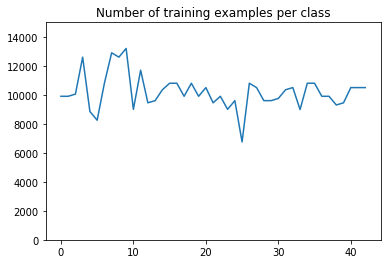

In [15]:
plt.plot([np.bincount(y_train.astype(np.int32), minlength = 43)[i] for i in range(43)])
plt.title("Number of training examples per class")
plt.ylim((0, 15000))

print("Size of training dataset:", len(X_train))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [16]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import cv2
import tensorflow as tf
from copy import copy


In [17]:
with open('./data/x_train_with_fakes.p', mode = 'rb') as f:
    X_train = pickle.load(f)
with open('./data/y_train_with_fakes.p', mode = 'rb') as f:
    y_train = pickle.load(f)
with open('./data/x_valid.p', mode= 'rb') as f:
    X_valid = pickle.load(f)
with open('./data/y_valid.p', mode= 'rb') as f:
    y_valid = pickle.load(f)
with open('./data/x_test.p', mode= 'rb') as f:
    X_test = pickle.load(f)
with open('./data/y_test.p', mode= 'rb') as f:
    y_test = pickle.load(f)

In [18]:
# Normalisation:

def normalize_per_image(x):
    channels = x.shape[3]
    x_out = np.zeros_like(x, dtype = np.float32)
    for index, img in enumerate(x):
        x_out[index] = cv2.normalize(img, x_out[index], alpha = -1, beta = 1, 
                      norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    return x_out

def center_global(x):
    x_out = np.zeros_like(x, dtype = np.float32)
    mean_img = np.mean(x, axis = 0, dtype = np.float64, keepdims = True)
    x_out = x - mean_img
    
    return x_out

def center_per_channel(x):
    x_out = np.zeros_like(x, dtype = np.float32)
    
    for c in range(x.shape[3]):  # Apply zero centering by channel
        x_out[:,:,:,c] = x[:,:,:,c] - np.mean(x[:,:,:,c], dtype = np.float32, keepdims = True)
    
    return x_out

X_train = normalize_per_image(X_train)
X_valid = normalize_per_image(X_valid)
X_test = normalize_per_image(X_test)

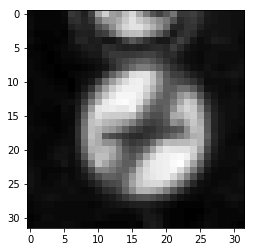

In [19]:
plt.imshow(X_train[0,:,:,0], cmap = 'gray')

### Model Architecture

In [93]:
from tensorflow.contrib.layers import flatten

# ConvNet filter and stride sizes:
cv1_fsize, cv1_stride = 5, 1
pl1_ksize, pl1_stride = 2, 2
cv2_fsize, cv2_stride = 5, 1
pl2_ksize, pl2_stride = 2, 2
    
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1
n_channels = X_train.shape[-1]
mu = 0.
sigma = 0.1

tf.reset_default_graph()

# Define weight and bias variables:
weights = {
    'cv1_w': tf.Variable(tf.truncated_normal([cv1_fsize, cv1_fsize, n_channels, 6], mu, sigma),
                         name = "c1w"),
    'cv2_w': tf.Variable(tf.truncated_normal([cv2_fsize, cv2_fsize, 6, 16], mu, sigma), name = "c2w"),
    'fc3_w': tf.Variable(tf.truncated_normal([400, 120], mu, sigma), name = "f3w"),
    'fc4_w': tf.Variable(tf.truncated_normal([120, 84], mu, sigma), name = "f4w"),
    'fc5_w': tf.Variable(tf.truncated_normal([84, 43], mu, sigma), name = "f5w")
}
biases = {
    'cv1_b': tf.Variable(tf.truncated_normal([6]), name = 'c1b'),
    'cv2_b': tf.Variable(tf.truncated_normal([16]), 'c2b'),
    'fc3_b': tf.Variable(tf.truncated_normal([120], mu, sigma), name = 'f3b'),
    'fc4_b': tf.Variable(tf.truncated_normal([84], mu, sigma), name = 'f4b'),
    'fc5_b': tf.Variable(tf.truncated_normal([43], mu, sigma), name = 'f5b')
}


'''
def batch_norm(inputs, is_training, scope_name, decay = .999):
    '''
    Wrapper for implementing batch normalization, with different values of mean
    and variance depending on whether we are training or predicting. Population 
    mean and variance use exponential moving averages.
    '''
    input_shape = inputs.get_shape()[-1]
    
    with tf.variable_scope(scope_name) as scope:
        try:
            scope.reuse_variables()
            scale = tf.get_variable("scale", dtype = tf.float32)
            beta = tf.get_variable("beta", dtype = tf.float32)
            pop_mean = tf.get_variable("pop_mean", dtype = tf.float32, trainable = False)
            pop_var = tf.get_variable("pop_var", dtype = tf.float32, trainable = False)
            
        except ValueError:
            scale = tf.get_variable("scale", dtype = tf.float32, 
                                    initializer = np.ones(input_shape, dtype = np.float32))
            beta = tf.get_variable("beta", dtype = tf.float32, 
                                   initializer = np.zeros(input_shape, dtype = np.float32))
            pop_mean = tf.get_variable("pop_mean", dtype = tf.float32,
                                       initializer = np.zeros(input_shape, dtype = np.float32),
                                       trainable = False)
            pop_var = tf.get_variable("pop_var", dtype = tf.float32,
                                      initializer = np.ones(input_shape, dtype = np.float32),
                                      trainable = False)   
 
    if is_training:
        batch_mean, batch_var = tf.nn.moments(inputs,[0, 1, 2])
        train_mean = tf.assign(pop_mean,
                               pop_mean * decay + batch_mean * (1 - decay))
        train_var = tf.assign(pop_var,
                              pop_var * decay + batch_var * (1 - decay))
        with tf.control_dependencies([train_mean, train_var]):
            return tf.nn.batch_normalization(inputs,
                batch_mean, batch_var, beta, scale, variance_epsilon = 1.e-5)
    else:
        return tf.nn.batch_normalization(inputs,
            pop_mean, pop_var, beta, scale, variance_epsilon = 1.e-5)
'''    
    
def LeNet(x, is_training, keep_prob):    
    '''
    Defines the ConvNet's architecture.
    '''      

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    cv1 = tf.nn.conv2d(x, weights['cv1_w'], strides = [1, cv1_stride, cv1_stride, 1], 
                       padding = 'VALID')  # No need for bias with batch normalization
    
    # Batch normalization##Suppressed
#    bn1 = batch_norm(cv1, is_training, 'bn1', decay = .999)
    
    # Activation.
    ac1 = tf.nn.relu(cv1)  ## Short cut batch normalization
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pl1 = tf.nn.max_pool(ac1, ksize = [1, pl1_ksize, pl1_ksize, 1], 
                         strides = [1, pl1_stride, pl1_stride, 1], padding = 'VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    cv2 = tf.nn.conv2d(pl1, weights['cv2_w'], strides = [1, cv2_stride, cv2_stride, 1],
                       padding = 'VALID')
   
    # Batch normalization##Suppressed
#    bn2 = batch_norm(cv2, is_training, 'bn2', decay = .999)
    
    # Activation.
    ac2 = tf.nn.relu(cv2)  ## Short cut batch normalization
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pl2 = tf.nn.max_pool(ac2, ksize = [1, pl2_ksize, pl2_ksize, 1],
                         strides= [1, pl2_stride, pl2_stride, 1], padding = 'VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(pl2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc3 = tf.add(tf.matmul(flat, weights['fc3_w']), biases['fc3_b'])
    
    # Activation.
    ac3 = tf.nn.relu(fc3)
    
    # Dropout:
    do3 = tf.nn.dropout(ac3, keep_prob * 1.2)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc4 = tf.add(tf.matmul(do3, weights['fc4_w']), biases['fc4_b'])
    
    # Activation.
    ac4 = tf.nn.relu(fc4)
    
    # Dropout:
    do4 = tf.nn.dropout(ac4, keep_prob * 0.8)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(do4, weights['fc5_w']), biases['fc5_b'])
    
    return logits

IndentationError: unexpected indent (<ipython-input-93-4314598dc8df>, line 39)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [94]:
# Number of channels:
channels = X_train.shape[3]
print("Each image has {} channel(s)".format(channels))
# Meta-parameters:
EPOCHS = 300
BATCH_SIZE = 128
rate = 0.001
TARGET = 0.975


def make_graph(learn_rate, is_training, keep_prob, channels):
    x = tf.placeholder(tf.float32, (None, 32, 32, channels), name = 'x_in')
    y = tf.placeholder(tf.int32, (None), name = 'y_lbl')

    #keep_prob = tf.placeholder(tf.float32)
    one_hot_y = tf.one_hot(y, 43)

    # Build graph
    logits = LeNet(x, is_training, keep_prob)

    # Softmax probabilities
    probs = tf.nn.softmax(logits)
    
    # Calculate loss
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y) 
    loss_operation = tf.reduce_mean(cross_entropy)

    # Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
    training_operation = optimizer.minimize(loss_operation)
    
    # Prediction accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    preds_operation = tf.argmax(tf.nn.softmax(logits), 1)
    
    # Model saver
    saver = tf.train.Saver()
    
    return x, y, probs, training_operation, accuracy_operation, preds_operation, saver
    

def evaluate(sess, X_data, y_data):
    preds = []
    num_examples = len(X_data)
    total_accuracy = 0
    #sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset : offset+BATCH_SIZE], y_data[offset : offset+BATCH_SIZE]
        accuracy, batch_preds = sess.run([accuracy_operation,
                                         preds_operation],
                                        feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        preds.append(batch_preds)
    return (total_accuracy / num_examples), preds


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    train_accuracies = []
    valid_accuracies = []
    
    print("Training...")
    print()
    i = 0

    while True:
        X_train, y_train = shuffle(X_train, y_train)     
        
        x, y, probs, training_operation, accuracy_operation, \
                preds_operation, saver = make_graph(rate, True, 0.4, channels)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        x, y, probs, training_operation, accuracy_operation, \
                preds_operation, saver = make_graph(rate, False, 1.0, channels)
        
        training_accuracy, _ = evaluate(sess, X_train, y_train)[0] 
        validation_accuracy, predictions = evaluate(sess, X_valid, y_valid)
                
        train_accuracies.append(training_accuracy)
        valid_accuracies.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        i += 1
        if validation_accuracy >= TARGET or i + 1 >= EPOCHS:
            break
    
    # Turn the list into a flat array:
    predictions = [item for batch in predictions for item in batch]
    predictions = np.array(predictions, order = 'C')
   
    saver.save(sess, './lenet')
    print("Model saved")

Each image has 1 channel(s)
Training...



FailedPreconditionError: Attempting to use uninitialized value beta1_power_1
	 [[Node: beta1_power_1/read = Identity[T=DT_FLOAT, _class=["loc:@c1w"], _device="/job:localhost/replica:0/task:0/gpu:0"](beta1_power_1)]]

Caused by op 'beta1_power_1/read', defined at:
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-94-3ebb9d3e97fd>", line 72, in <module>
    x, y, probs, training_operation, accuracy_operation,                 preds_operation, saver = make_graph(rate, True, 0.4, channels)
  File "<ipython-input-94-3ebb9d3e97fd>", line 30, in make_graph
    training_operation = optimizer.minimize(loss_operation)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/optimizer.py", line 279, in minimize
    name=name)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/optimizer.py", line 393, in apply_gradients
    self._create_slots(var_list)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/adam.py", line 113, in _create_slots
    trainable=False)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value beta1_power_1
	 [[Node: beta1_power_1/read = Identity[T=DT_FLOAT, _class=["loc:@c1w"], _device="/job:localhost/replica:0/task:0/gpu:0"](beta1_power_1)]]


(0.5, 1.0)

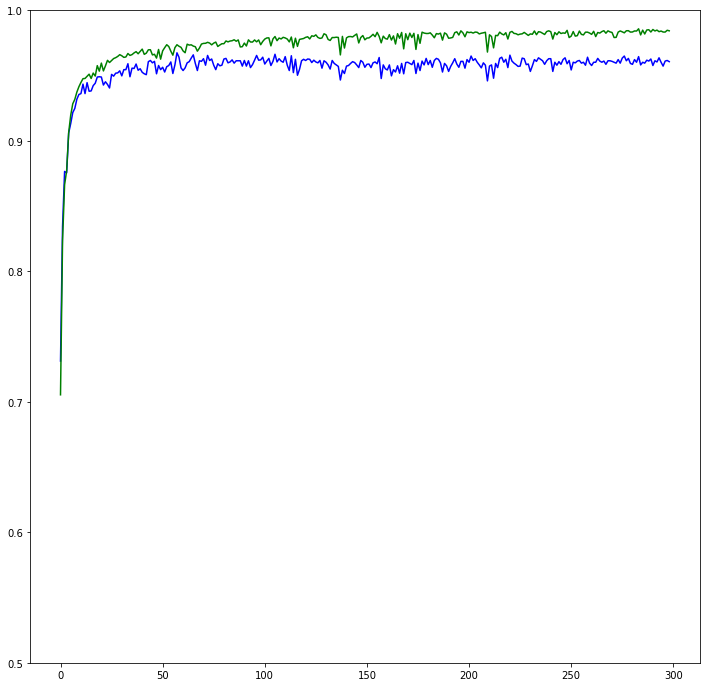

In [18]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.plot(valid_accuracies, c = 'b')
ax.plot(train_accuracies, c = 'g')
plt.ylim(0.5, 1.)

Number of misclassifications: 173


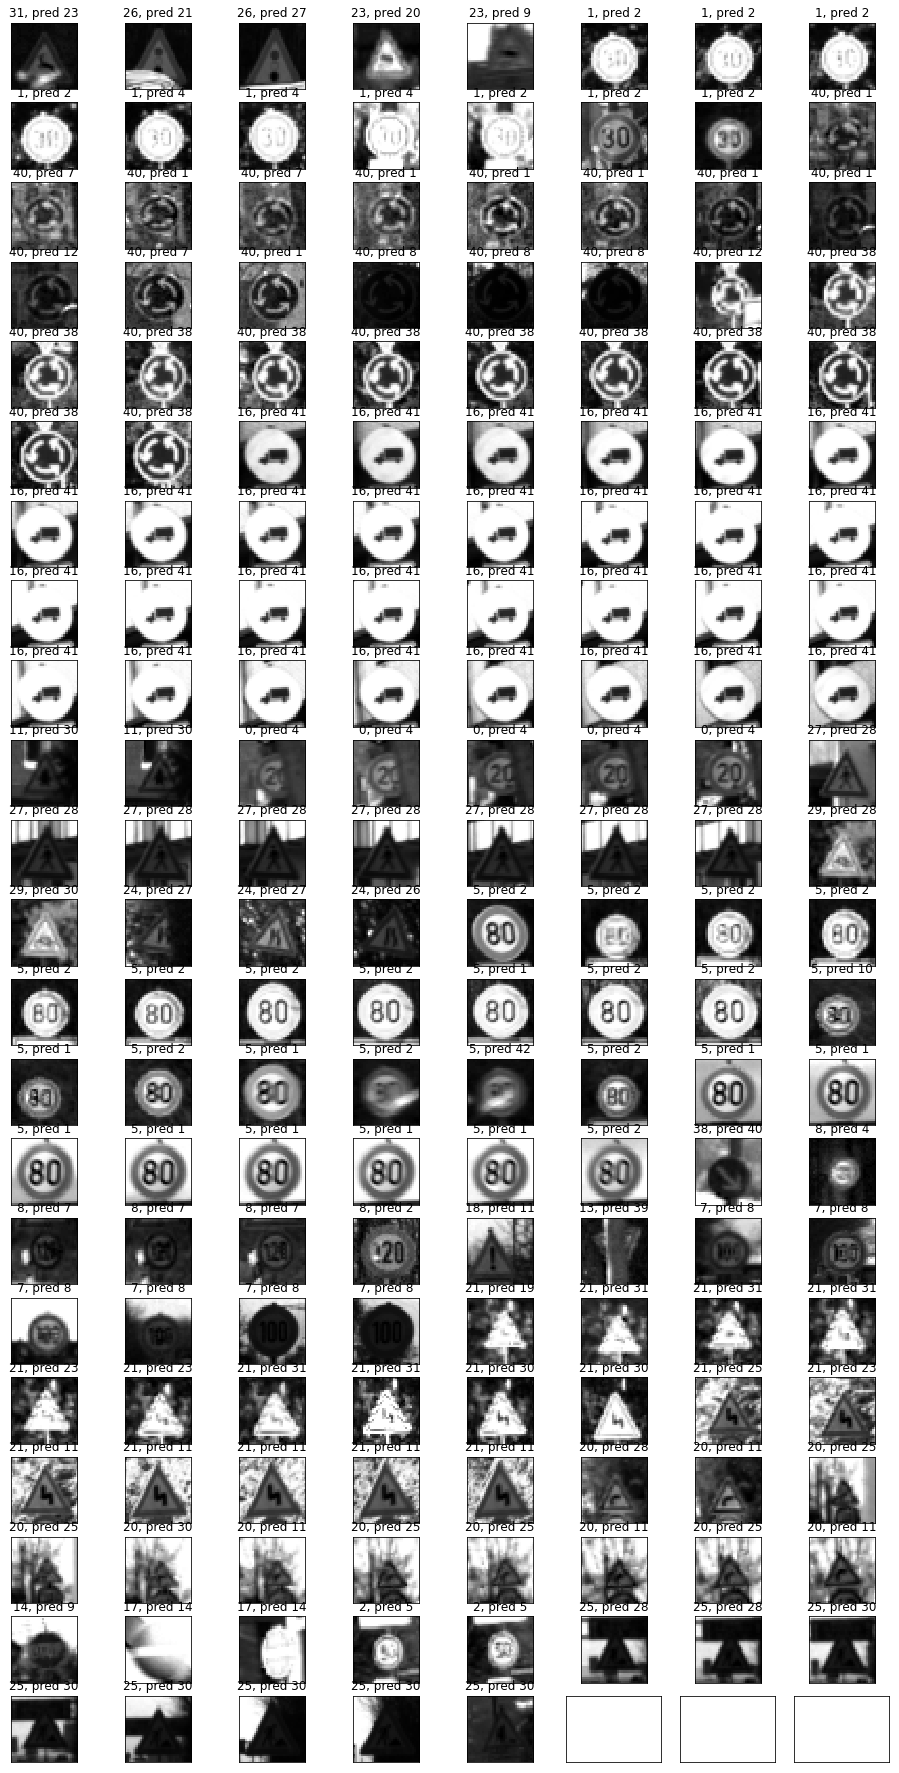

In [19]:
wrong_idx = [i for i in range(len(predictions)) if predictions[i] != y_valid[i]]
print("Number of misclassifications: %d" % len(wrong_idx))
f, axis = plt.subplots(nrows = len(wrong_idx) // 8 + 1, ncols = 8, figsize = (16, 32),
                       subplot_kw = {'xticks': [], 'yticks': []})

for i in range(min([len(wrong_idx), len(wrong_idx)])):
    img_idx = wrong_idx[i]
    axis[i//8, i%8].set_title("%d, pred %d" % (y_valid[img_idx], predictions[img_idx]))
    axis[i//8, i%8].imshow(X_valid[img_idx][:,:,0], cmap = 'gray')

In [ ]:
errors = pd.DataFrame({'predicted': predictions, 'actual': y_valid})
print(errors)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [42]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [43]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [44]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [45]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 